In [1]:
! git clone https://www.github.com/sterlinggutterman/Final-Project

Cloning into 'Final-Project'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 47 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 37.15 MiB | 10.55 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_parquet('Final-Project/full_df (2).parquet')
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,reordered_yes/no,order_day,total_order_count,product_name,aisle_id,department_id,aisle,department
0,361493,27,prior,1,3,9,NaN,25718,1,0,no,tuesday,81,Cold Brew Coffee,26,7,coffee,beverages
1,1662354,27,prior,2,2,17,6.0,30776,1,0,no,monday,81,Organic Raw Kombucha Gingerade,31,7,refrigerated,beverages
2,1662354,27,prior,2,2,17,6.0,9604,2,0,no,monday,81,Hibiscus Organic Raw Kombucha,31,7,refrigerated,beverages
3,1662354,27,prior,2,2,17,6.0,6287,3,0,no,monday,81,Organic & Raw Strawberry Serenity Kombucha,31,7,refrigerated,beverages
4,1662354,27,prior,2,2,17,6.0,20947,4,0,no,monday,81,Passionberry Bliss Kombucha Drink,31,7,refrigerated,beverages


In [3]:
df=df.drop(columns=["eval_set"])

In [4]:
import pickle
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
for each in df.columns:
    df[each]=df[each].fillna(0)

In [6]:
from sklearn import linear_model

# Target variable:
y = df['reordered']

# Numeric:
var_num = ['order_id', 'user_id', 'order_number', 'days_since_prior_order',
       'order_hour_of_day', 'order_dow', 'add_to_cart_order',
        'total_order_count']
X_num = df.loc[:,var_num]

# Dummies:
var_cat = ['reordered_yes/no', 'order_day','department']
dummies = pd.DataFrame([])
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1)

# Create covariates:
X = pd.concat([X_num, dummies],axis=1)

# Scale data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

In [7]:
y = df['reordered']

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=125)

In [8]:
#df['days_since_prior_order']=df['days_since_prior_order'].fillna(0)
#df['add_to_cart_order'] = df['add_to_cart_order'].fillna(0)

lm_0 = LinearRegression(fit_intercept=False).fit(X_train,y_train)
y_hat_test_0 = lm_0.predict(X_test)
y_hat_train_0 = lm_0.predict(X_train)
print('train: ', r2_score(y_hat_train_0,y_train) )
print('test: ', r2_score(y_hat_test_0,y_test) )

train:  -5.715509454958354
test:  -5.701977876630572


In [9]:
reduction = PCA(n_components = 2).fit(X_train)
Z_train=reduction.transform(X_train)
Z_test=reduction.transform(X_test)


lm_k = LinearRegression().fit(Z_train,y_train)
y_hat_test = lm_k.predict(Z_test)
y_hat_train = lm_k.predict(Z_train)

print('Train r2: ', r2_score(y_hat_train,y_train) )
print('Test r2: ', r2_score(y_hat_test,y_test) )    

Train r2:  0.9220962738923407
Test r2:  0.9221610011712198


<Axes: >

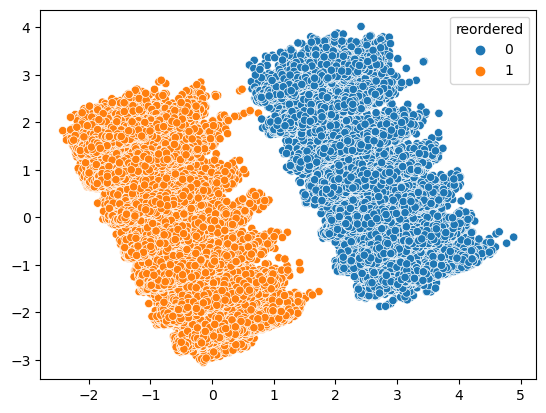

In [12]:
sns.scatterplot(x=Z_test[:,0],y=Z_test[:,1],hue=y_test)